In [4]:
"""
Notebook demonstrating difference between stochastic/batch using Tensorflow
"""

import tensorflow as tf
import numpy as np

batch_size = 10
learning_rate = 0.01

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

W = tf.Variable(tf.random_normal(shape=[1,1]))

pred = tf.matmul(x,W)
loss = tf.reduce_mean(tf.square(pred - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train_step = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [5]:
loss_batch = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        rand_idx = np.random.choice(100, size=batch_size)
        rand_x = np.transpose([x_vals[rand_idx]])
        rand_y = np.transpose([y_vals[rand_idx]])
        sess.run(train_step, feed_dict = {x: rand_x, y: rand_y})
        temp_loss = sess.run(loss, feed_dict = {x: rand_x, y: rand_y})
        
        if (i+1) % 5 == 0:
            print('Epoch %d ' % i,  'Loss: %s' % temp_loss)
            
        loss_batch.append(temp_loss)
        
print('\n\n')
loss_stochastic = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        rand_idx = np.random.choice(100, size=1)
        rand_x = np.transpose([x_vals[rand_idx]])
        rand_y = np.transpose([y_vals[rand_idx]])
        sess.run(train_step, feed_dict = {x: rand_x, y: rand_y})
        temp_loss = sess.run(loss, feed_dict = {x: rand_x, y: rand_y})
        
        if (i+1) % 5 == 0:
            print('Epoch %d ' % i,  'Loss: %s' % temp_loss)
            
        loss_stochastic.append(temp_loss)
        
    
    
    

('Epoch 4 ', 'Loss: 91.4676')
('Epoch 9 ', 'Loss: 74.0777')
('Epoch 14 ', 'Loss: 60.883')
('Epoch 19 ', 'Loss: 49.4134')
('Epoch 24 ', 'Loss: 40.8692')
('Epoch 29 ', 'Loss: 33.4948')
('Epoch 34 ', 'Loss: 27.2766')
('Epoch 39 ', 'Loss: 22.8306')
('Epoch 44 ', 'Loss: 16.9894')
('Epoch 49 ', 'Loss: 15.1194')
('Epoch 54 ', 'Loss: 13.1444')
('Epoch 59 ', 'Loss: 11.107')
('Epoch 64 ', 'Loss: 8.33634')
('Epoch 69 ', 'Loss: 7.42707')
('Epoch 74 ', 'Loss: 7.38262')
('Epoch 79 ', 'Loss: 4.66207')
('Epoch 84 ', 'Loss: 3.65245')
('Epoch 89 ', 'Loss: 2.63413')
('Epoch 94 ', 'Loss: 3.7357')
('Epoch 99 ', 'Loss: 4.36837')



('Epoch 4 ', 'Loss: 49.4551')
('Epoch 9 ', 'Loss: 45.1837')
('Epoch 14 ', 'Loss: 38.9519')
('Epoch 19 ', 'Loss: 18.5001')
('Epoch 24 ', 'Loss: 22.0467')
('Epoch 29 ', 'Loss: 9.16669')
('Epoch 34 ', 'Loss: 11.8782')
('Epoch 39 ', 'Loss: 26.9527')
('Epoch 44 ', 'Loss: 9.18346')
('Epoch 49 ', 'Loss: 15.2523')
('Epoch 54 ', 'Loss: 7.49653')
('Epoch 59 ', 'Loss: 5.74616')
('Epoch 64 '

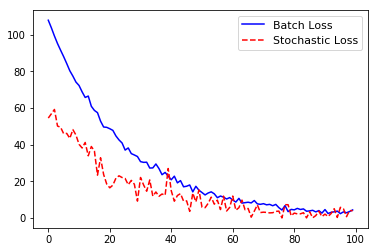

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(0, 100, 1), loss_batch, 'b-', label='Batch Loss')
plt.plot(range(0,100,1), loss_stochastic, 'r--', label='Stochastic Loss')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()